In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [12]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test_vec)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [16]:
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.99


In [17]:
print('\nConfusion Matrix:')
print(confusion_mat)



Confusion Matrix:
[[966   0]
 [  9 140]]


In [18]:
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



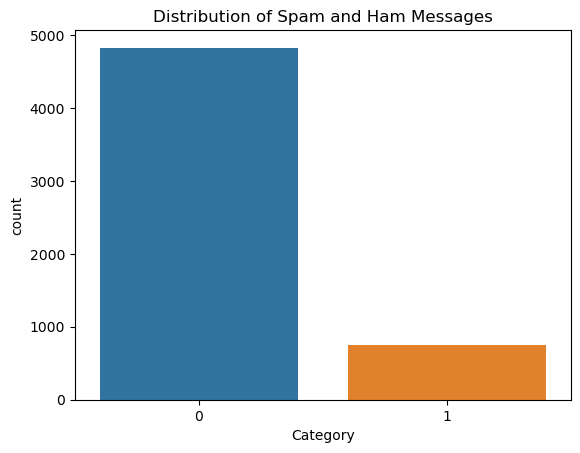

In [19]:
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

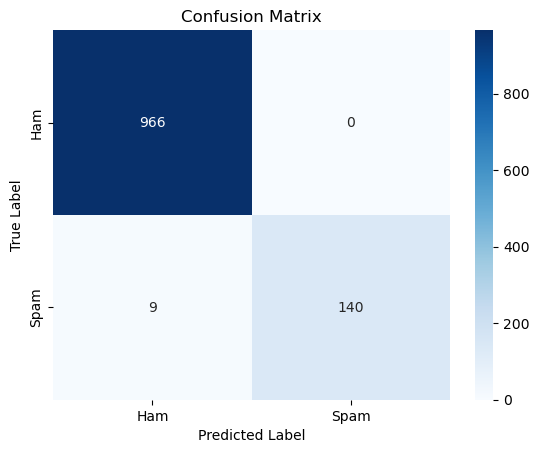

In [20]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


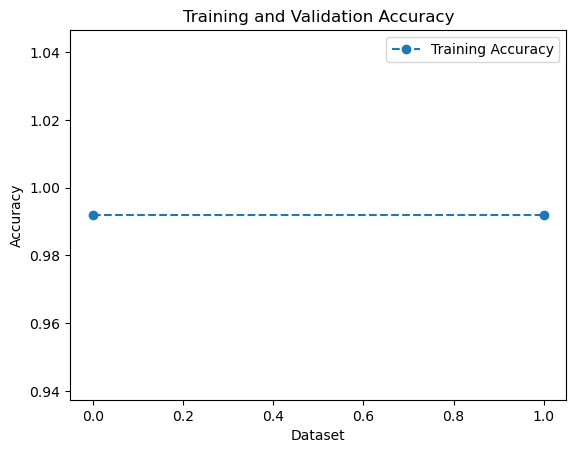

In [21]:
plt.plot([0, 1], [accuracy, accuracy], label='Training Accuracy', marker='o', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
new_messages = ["Congratulations! You've won a prize!", "Hello, how are you?"]
new_messages_vec = vectorizer.transform(new_messages)
predictions = model.predict(new_messages_vec)

In [23]:
print("Predictions:")
for message, prediction in zip(new_messages, predictions):
    print(f"{message} - {'spam' if prediction == 1 else 'ham'}")

Predictions:
Congratulations! You've won a prize! - spam
Hello, how are you? - ham
